# Women’s neuroplasticity during gestation, childbirth, and postpartum (Supplementary material)

This Jupyter notebook provides the code used to plot the surface-based, vertex-wise maps showed in the **supplementary material** figures of the manuscript entitled "Women’s neuroplasticity during gestation, childbirth, and postpartum" submitted to Nature Neuroscience for consideration for publication.

The necessary data to generate the figures is provided along with this notebook in the GitHub repository [neuromaternal/peripartum_neuroplasticity
](https://github.com/neuromaternal/peripartum_neuroplasticity)

In [4]:
# Importing necessary python modules and setting up seaborn plotting style
import nibabel as nib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
from nilearn.plotting.surf_plotting import _colorbar_from_array
from nilearn import plotting
from nilearn import datasets
import os
import gc

sns.set_style('ticks')
sns.set_context('paper')

## Figure SM 1: Signed effect size for group differences in Prg and Post vertex-wise maps for cortical metrics

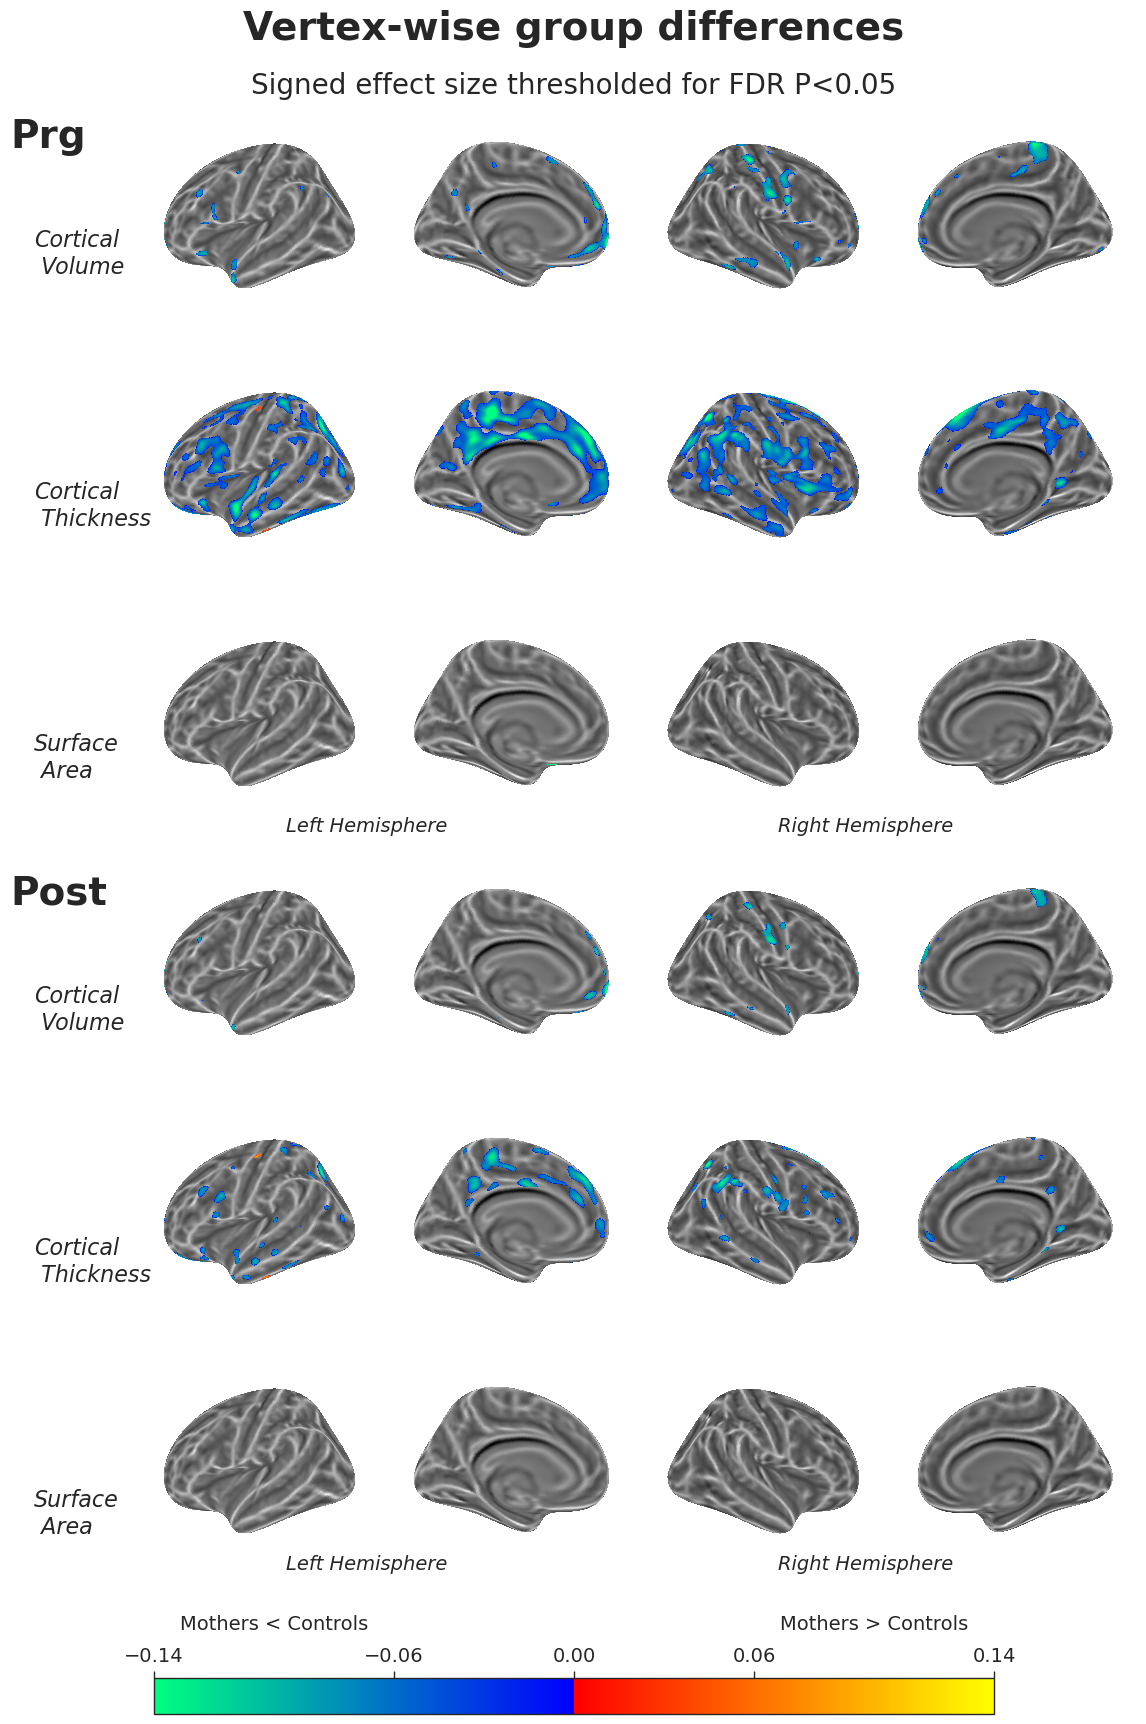

In [5]:
# Defining surface inputs and parameters to select the surface maps
fsaverage = datasets.fetch_surf_fsaverage('fsaverage') 
results_dir = os.path.join(os.getcwd(), 'main_data', 'without_covariates')

stat = 'FDRcorrP_across_hemi'
eff_size = 'partialETA2'
alpha = 0.05
one_minus_alpha = 1.0 - alpha

# Defining colormaps and limits for the visualization and colorbar
vmax_value = 0.14
threshold = 0.001
colors_pos = plt.cm.autumn(np.linspace(0, 1, 128))
colors_neg = plt.cm.winter(np.linspace(1, 0, 128))
colors = np.vstack((colors_neg, colors_pos))
our_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Defining contrasts and cortical measures to plot
contrasts = ['sesPrg', 'sesPost']
contrast_labels = ['Prg', 'Post']
measures = ['volume', 'thickness', 'area']

# Plotting
figsm1, axsm1 = plt.subplots(6, 4, subplot_kw={'projection': '3d'}, figsize=(12,18))
figsm1.subplots_adjust(wspace=0, hspace=0, top=0.92, right=0.97, left=0.13, bottom=0.09)
for c, contrast in enumerate(contrasts):
    for w, measure in enumerate(measures):
        for i, (hemi, hemi_name, surf, surf_bg) in enumerate(zip(["lh", "rh"],
                                                        ["left", "right"],
                                                        [fsaverage.infl_left, fsaverage.infl_right],
                                                        [fsaverage.curv_left, fsaverage.curv_right])):
            # Loading the fdr-pvalue, effect size and sign maps 
            mfdrp_map_name = f"{hemi}.{measure}_sm10_{stat}_contrast_{contrast}.mgh"
            eff_size_map_name = f"{hemi}.{measure}_sm10_{eff_size}_contrast_{contrast}.mgh"
            sgn_map_name = f"{hemi}.{measure}_sm10_sgn_contrast_{contrast}.mgh"

            mfdrp_data = nib.load(f"{results_dir}/{mfdrp_map_name}").get_fdata()
            eff_size_data = nib.load(f"{results_dir}/{eff_size_map_name}").get_fdata()
            sgn_data = nib.load(f"{results_dir}/{sgn_map_name}").get_fdata()

            # Computing thresholded signed effect size maps
            surf_map = sgn_data * eff_size_data * (mfdrp_data > one_minus_alpha)
            for j, view in enumerate(["lateral","medial"]):
                 plotting.plot_surf_stat_map(surf,
                                             surf_map,
                                             hemi=hemi_name,
                                             view=view,
                                             vmax=vmax_value,
                                             threshold=threshold,
                                             bg_map=surf_bg,
                                             cmap=our_cmap,
                                             colorbar=False,
                                             axes=axsm1[3*c+w, 2*i+j])
figsm1.text(0.50, 0.95, s='Vertex-wise group differences', fontsize=28, fontweight='bold', ha='center')
figsm1.text(0.50, 0.92, s='Signed effect size thresholded for FDR P<0.05', fontsize=20, ha='center')
figsm1.text(0.03, 0.89, s='Prg', fontsize=28, fontweight='bold')
figsm1.text(0.03, 0.47, s='Post', fontsize=28, fontweight='bold')
figsm1.text(0.05, 0.82, s='Cortical\n Volume', fontsize=16, style='italic')
figsm1.text(0.05, 0.68, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm1.text(0.05, 0.54, s='Surface\n Area', fontsize=16, style='italic')
figsm1.text(0.05, 0.40, s='Cortical\n Volume', fontsize=16, style='italic')
figsm1.text(0.05, 0.26, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm1.text(0.05, 0.12, s='Surface\n Area', fontsize=16, style='italic')
figsm1.text(0.26, 0.51, s='Left Hemisphere', fontsize=14, style='italic')
figsm1.text(0.67, 0.51, s='Right Hemisphere', fontsize=14, style='italic')
figsm1.text(0.26, 0.10, s='Left Hemisphere', fontsize=14, style='italic')
figsm1.text(0.67, 0.10, s='Right Hemisphere', fontsize=14, style='italic')

# Colorbar setup
cbar_axsm1 = figsm1.add_axes([0.15, 0.02, 0.7, 0.02])
cbsm1 = _colorbar_from_array(np.random.random([0, 1]), vmax_value, None, {}, cmap=our_cmap)
fig_cbsm1 = figsm1.colorbar(cbsm1, cax=cbar_axsm1, ticks=[-vmax_value, -0.06, 0.00, 0.06, vmax_value], orientation='horizontal')
cbar_axsm1.tick_params(labelsize=14)
cbar_axsm1.xaxis.set_label_position('top')
cbar_axsm1.xaxis.set_ticks_position('top')
figsm1.text(0.25, 0.07, s='Mothers < Controls', fontsize=14, va='center', ha='center')
figsm1.text(0.75, 0.07, s='Mothers > Controls', fontsize=14, va='center', ha='center')
figsm1.savefig('Figure-sm1_Prg-and-Post-group-differences-vertex-wise-effect-size.png', dpi=300)

In [6]:
# Free RAM memory for next figure
figsm1.clf()
gc.collect()

15733361

## Figure SM 2: Vertex-wise group differences including potential confounding variables

### Figure SM 2.b: Vertex-wise group differences including *Age* and *TIV* (eTIV) and *meanEulerNumber* as covariates

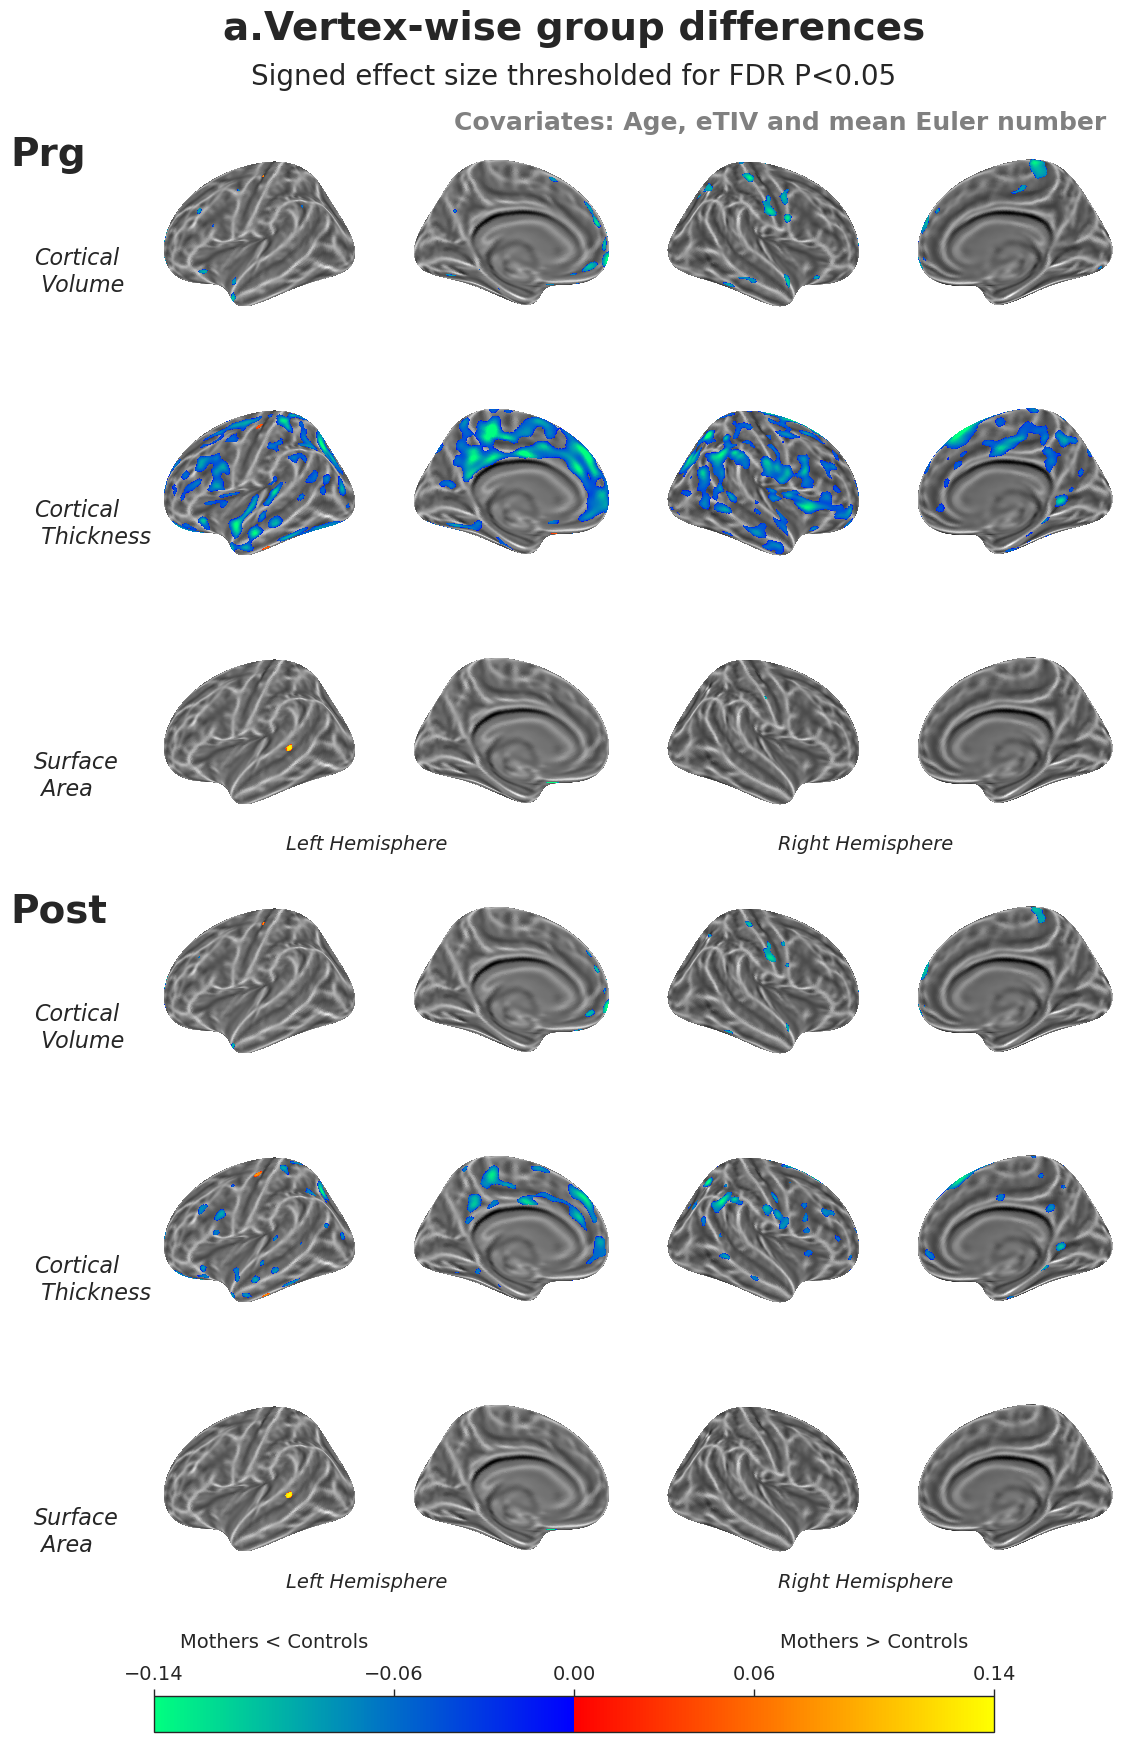

In [7]:
# Defining surface inputs and parameters to select the surface maps
fsaverage = datasets.fetch_surf_fsaverage('fsaverage') 
results_dir = os.path.join(os.getcwd(), 'main_data', 'covariates_euler_age_etiv')

stat = 'FDRcorrP_across_hemi'
eff_size = 'partialETA2'
alpha = 0.05
one_minus_alpha = 1.0 - alpha

# Defining colormaps and limits for the visualization and colorbar
vmax_value = 0.14
threshold = 0.001
colors_pos = plt.cm.autumn(np.linspace(0, 1, 128))
colors_neg = plt.cm.winter(np.linspace(1, 0, 128))
colors = np.vstack((colors_neg, colors_pos))
our_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Defining contrasts and cortical measures to plot
contrasts = ['sesPrg', 'sesPost']
contrast_labels = ['Prg', 'Post']
measures = ['volume', 'thickness', 'area']

# Plotting
figsm2a, axsm2a = plt.subplots(6, 4, subplot_kw={'projection': '3d'}, figsize=(12,18))
figsm2a.subplots_adjust(wspace=0, hspace=0, top=0.92, right=0.97, left=0.13, bottom=0.09)
for c, contrast in enumerate(contrasts):
    for w, measure in enumerate(measures):
        for i, (hemi, hemi_name, surf, surf_bg) in enumerate(zip(["lh", "rh"],
                                                        ["left", "right"],
                                                        [fsaverage.infl_left, fsaverage.infl_right],
                                                        [fsaverage.curv_left, fsaverage.curv_right])):
            # Loading the fdr-pvalue, effect size and sign maps 
            mfdrp_map_name = f"{hemi}.{measure}_sm10_{stat}_contrast_{contrast}.mgh"
            eff_size_map_name = f"{hemi}.{measure}_sm10_{eff_size}_contrast_{contrast}.mgh"
            sgn_map_name = f"{hemi}.{measure}_sm10_sgn_contrast_{contrast}.mgh"

            mfdrp_data = nib.load(f"{results_dir}/{mfdrp_map_name}").get_fdata()
            eff_size_data = nib.load(f"{results_dir}/{eff_size_map_name}").get_fdata()
            sgn_data = nib.load(f"{results_dir}/{sgn_map_name}").get_fdata()

            # Computing thresholded signed effect size maps
            surf_map = sgn_data * eff_size_data * (mfdrp_data > one_minus_alpha)
            for j, view in enumerate(["lateral","medial"]):
                plotting.plot_surf_stat_map(surf,
                                            surf_map,
                                            hemi=hemi_name,
                                            view=view,
                                            vmax=vmax_value,
                                            threshold=threshold,
                                            bg_map=surf_bg,
                                            cmap=our_cmap,
                                            colorbar=False,
                                            axes=axsm2a[3*c+w, 2*i+j])
            
figsm2a.text(0.50, 0.96, s='a.Vertex-wise group differences', fontsize=28, fontweight='bold', ha='center')
figsm2a.text(0.50, 0.935, s='Signed effect size thresholded for FDR P<0.05', fontsize=20, ha='center')
figsm2a.text(0.40, 0.91, s='Covariates: Age, eTIV and mean Euler number ', fontsize=18, color='gray', fontweight='bold')
figsm2a.text(0.03, 0.89, s='Prg', fontsize=28, fontweight='bold')
figsm2a.text(0.03, 0.47, s='Post', fontsize=28, fontweight='bold')
figsm2a.text(0.05, 0.82, s='Cortical\n Volume', fontsize=16, style='italic')
figsm2a.text(0.05, 0.68, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm2a.text(0.05, 0.54, s='Surface\n Area', fontsize=16, style='italic')
figsm2a.text(0.05, 0.40, s='Cortical\n Volume', fontsize=16, style='italic')
figsm2a.text(0.05, 0.26, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm2a.text(0.05, 0.12, s='Surface\n Area', fontsize=16, style='italic')
figsm2a.text(0.26, 0.51, s='Left Hemisphere', fontsize=14, style='italic')
figsm2a.text(0.67, 0.51, s='Right Hemisphere', fontsize=14, style='italic')
figsm2a.text(0.26, 0.10, s='Left Hemisphere', fontsize=14, style='italic')
figsm2a.text(0.67, 0.10, s='Right Hemisphere', fontsize=14, style='italic')

# Colorbar setup
cbar_axsm2a = figsm2a.add_axes([0.15, 0.02, 0.7, 0.02])
cbsm2a = _colorbar_from_array(np.random.random([0, 1]), vmax_value, None, {}, cmap=our_cmap)
fig_cbsm2a = figsm2a.colorbar(cbsm2a, cax=cbar_axsm2a, ticks=[-vmax_value, -0.06, 0.00, 0.06, vmax_value], orientation='horizontal')
cbar_axsm2a.tick_params(labelsize=14)
cbar_axsm2a.xaxis.set_label_position('top')
cbar_axsm2a.xaxis.set_ticks_position('top')
figsm2a.text(0.25, 0.07, s='Mothers < Controls', fontsize=14, va='center', ha='center')
figsm2a.text(0.75, 0.07, s='Mothers > Controls', fontsize=14, va='center', ha='center')

figsm2a.savefig('Figure-sm2a_vertex-wise-signed-effect-size-group-differences-with-age-etiv-and-euler-as-covariates.png', dpi=300)

In [8]:
# Free RAM memory for next figure
figsm2a.clf()
gc.collect()

15733374

### Figure SM 2.b: Vertex-wise group differences including *Age* and *TIV* (eTIV), *meanEulerNumber*, *PSQI* and *PSS* as covariates

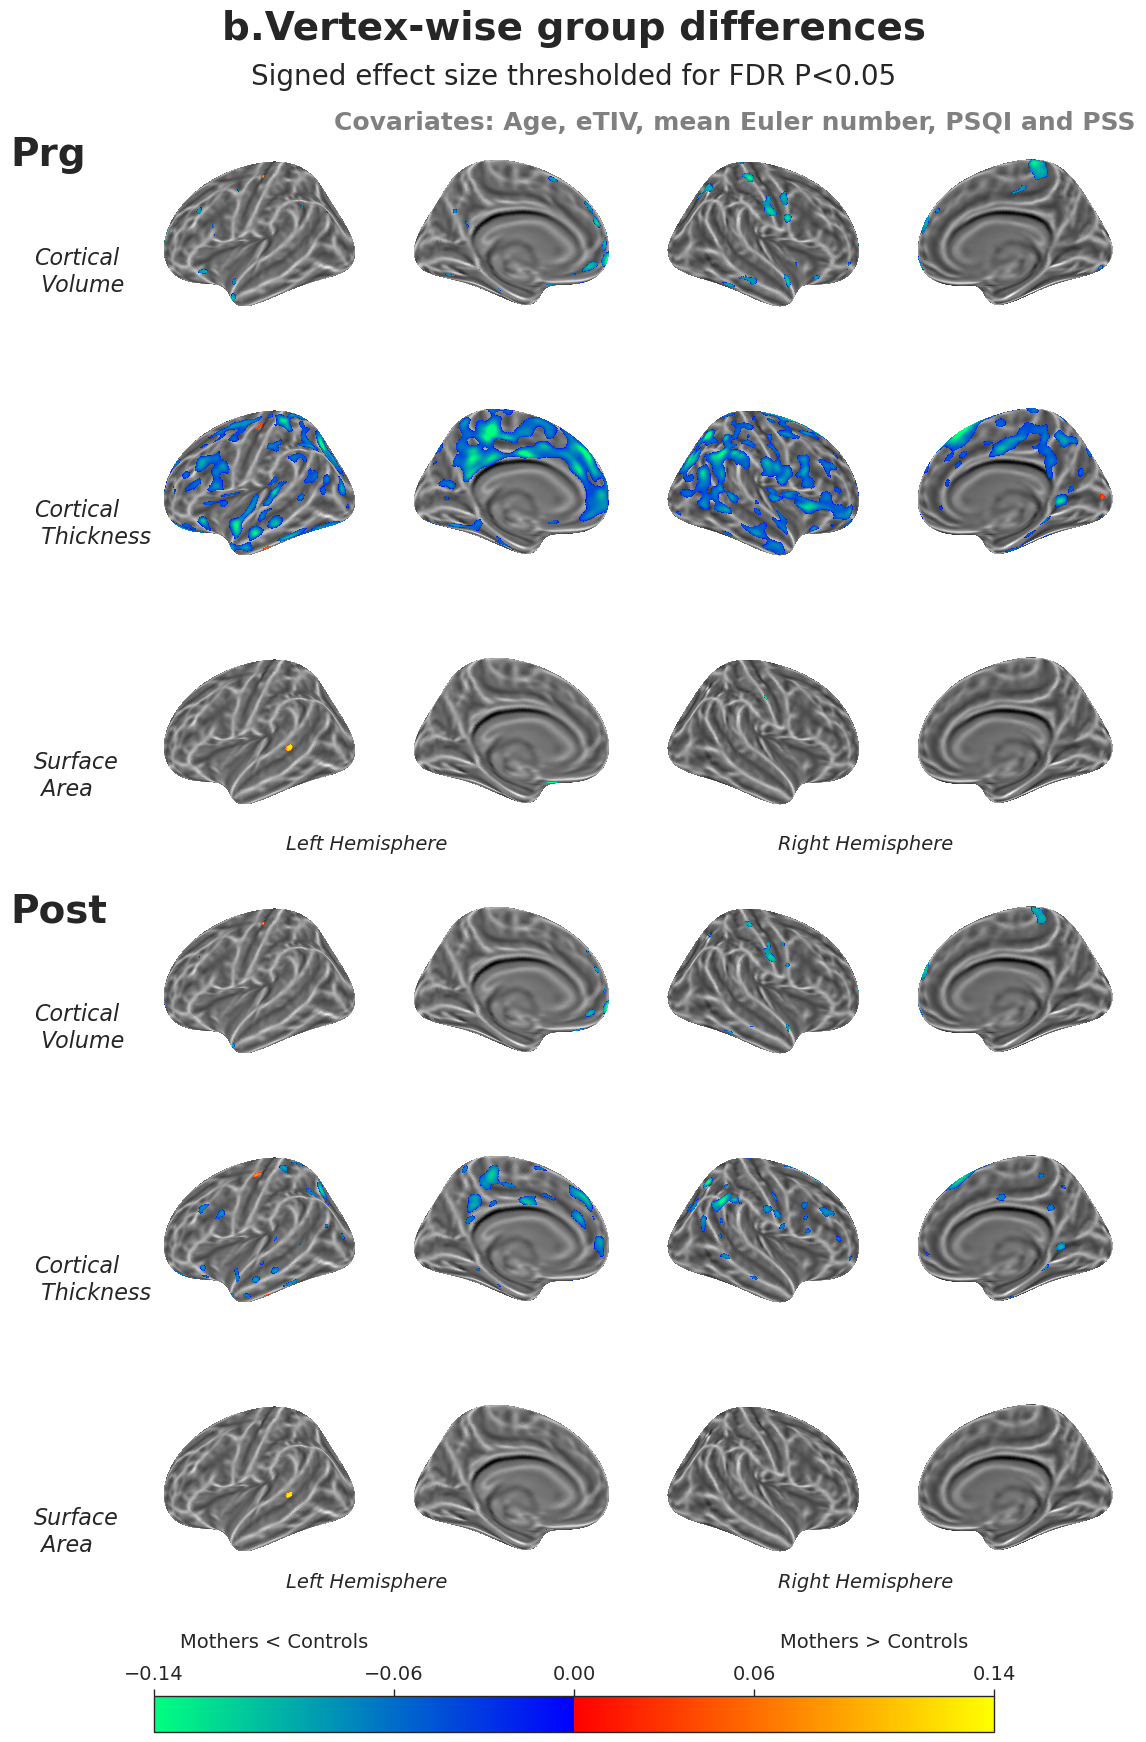

In [9]:
# Importing necessary python modules 
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from nilearn import plotting
from nilearn import datasets
from nilearn.plotting.surf_plotting import _colorbar_from_array
import os

# Defining surface inputs and parameters to select the surface maps
fsaverage = datasets.fetch_surf_fsaverage('fsaverage') 
results_dir = os.path.join(os.getcwd(), 'main_data', 'covariates_euler_age_etiv_psqi_pss')

stat = 'FDRcorrP_across_hemi'
eff_size = 'partialETA2'
alpha = 0.05
one_minus_alpha = 1.0 - alpha

# Defining colormaps and limits for the visualization and colorbar
vmax_value = 0.14
threshold = 0.001
colors_pos = plt.cm.autumn(np.linspace(0, 1, 128))
colors_neg = plt.cm.winter(np.linspace(1, 0, 128))
colors = np.vstack((colors_neg, colors_pos))
our_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Defining contrasts and cortical measures to plot
contrasts = ['sesPrg', 'sesPost']
contrast_labels = ['Prg', 'Post']
measures = ['volume', 'thickness', 'area']

# Plotting
figsm2b, axsm2b = plt.subplots(6, 4, subplot_kw={'projection': '3d'}, figsize=(12,18))
figsm2b.subplots_adjust(wspace=0, hspace=0, top=0.92, right=0.97, left=0.13, bottom=0.09)
for c, contrast in enumerate(contrasts):
    for w, measure in enumerate(measures):
        for i, (hemi, hemi_name, surf, surf_bg) in enumerate(zip(["lh", "rh"],
                                                        ["left", "right"],
                                                        [fsaverage.infl_left, fsaverage.infl_right],
                                                        [fsaverage.curv_left, fsaverage.curv_right])):
            # Loading the fdr-pvalue, effect size and sign maps 
            mfdrp_map_name = f"{hemi}.{measure}_sm10_{stat}_contrast_{contrast}.mgh"
            eff_size_map_name = f"{hemi}.{measure}_sm10_{eff_size}_contrast_{contrast}.mgh"
            sgn_map_name = f"{hemi}.{measure}_sm10_sgn_contrast_{contrast}.mgh"

            mfdrp_data = nib.load(f"{results_dir}/{mfdrp_map_name}").get_fdata()
            eff_size_data = nib.load(f"{results_dir}/{eff_size_map_name}").get_fdata()
            sgn_data = nib.load(f"{results_dir}/{sgn_map_name}").get_fdata()

            # Computing thresholded signed effect size maps
            surf_map = sgn_data * eff_size_data * (mfdrp_data > one_minus_alpha)
            for j, view in enumerate(["lateral","medial"]):
                plotting.plot_surf_stat_map(surf,
                                            surf_map,
                                            hemi=hemi_name,
                                            view=view,
                                            vmax=vmax_value,
                                            threshold=threshold,
                                            bg_map=surf_bg,
                                            cmap=our_cmap,
                                            colorbar=False,
                                            axes=axsm2b[3*c+w, 2*i+j])
            
figsm2b.text(0.50, 0.96, s='b.Vertex-wise group differences', fontsize=28, fontweight='bold', ha='center')
figsm2b.text(0.50, 0.935, s='Signed effect size thresholded for FDR P<0.05', fontsize=20, ha='center')
figsm2b.text(0.30, 0.91, s='Covariates: Age, eTIV, mean Euler number, PSQI and PSS', fontsize=18, color='gray', fontweight='bold')
figsm2b.text(0.03, 0.89, s='Prg', fontsize=28, fontweight='bold')
figsm2b.text(0.03, 0.47, s='Post', fontsize=28, fontweight='bold')
figsm2b.text(0.05, 0.82, s='Cortical\n Volume', fontsize=16, style='italic')
figsm2b.text(0.05, 0.68, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm2b.text(0.05, 0.54, s='Surface\n Area', fontsize=16, style='italic')
figsm2b.text(0.05, 0.40, s='Cortical\n Volume', fontsize=16, style='italic')
figsm2b.text(0.05, 0.26, s='Cortical\n Thickness', fontsize=16, style='italic')
figsm2b.text(0.05, 0.12, s='Surface\n Area', fontsize=16, style='italic')
figsm2b.text(0.26, 0.51, s='Left Hemisphere', fontsize=14, style='italic')
figsm2b.text(0.67, 0.51, s='Right Hemisphere', fontsize=14, style='italic')
figsm2b.text(0.26, 0.10, s='Left Hemisphere', fontsize=14, style='italic')
figsm2b.text(0.67, 0.10, s='Right Hemisphere', fontsize=14, style='italic')

# Colorbar setup
cbar_axsm2b = figsm2b.add_axes([0.15, 0.02, 0.7, 0.02])
cbsm2b = _colorbar_from_array(np.random.random([0, 1]), vmax_value, None, {}, cmap=our_cmap)
fig_cbsm2b = figsm2b.colorbar(cbsm2b, cax=cbar_axsm2b, ticks=[-vmax_value, -0.06, 0.00, 0.06, vmax_value], orientation='horizontal')
cbar_axsm2b.tick_params(labelsize=14)
cbar_axsm2b.xaxis.set_label_position('top')
cbar_axsm2b.xaxis.set_ticks_position('top')
figsm2b.text(0.25, 0.07, s='Mothers < Controls', fontsize=14, va='center', ha='center')
figsm2b.text(0.75, 0.07, s='Mothers > Controls', fontsize=14, va='center', ha='center')
figsm2b.savefig('Figure-sm2b_vertex-wise-signed-effect-size-group-differences-with-age-etiv-euler-psqi-and-pss-as-covariates.png', dpi=300)

In [10]:
# Free RAM memory for next figure
figsm2b.clf()
gc.collect()

15733374

## Figure SM 3: Vertex-wise Group*Session differences including potential confounding variables

### Figure SM 3.a: Vertex-wise group x session differences including *Age* and *TIV* (eTIV) and *meanEulerNumber* as covariates

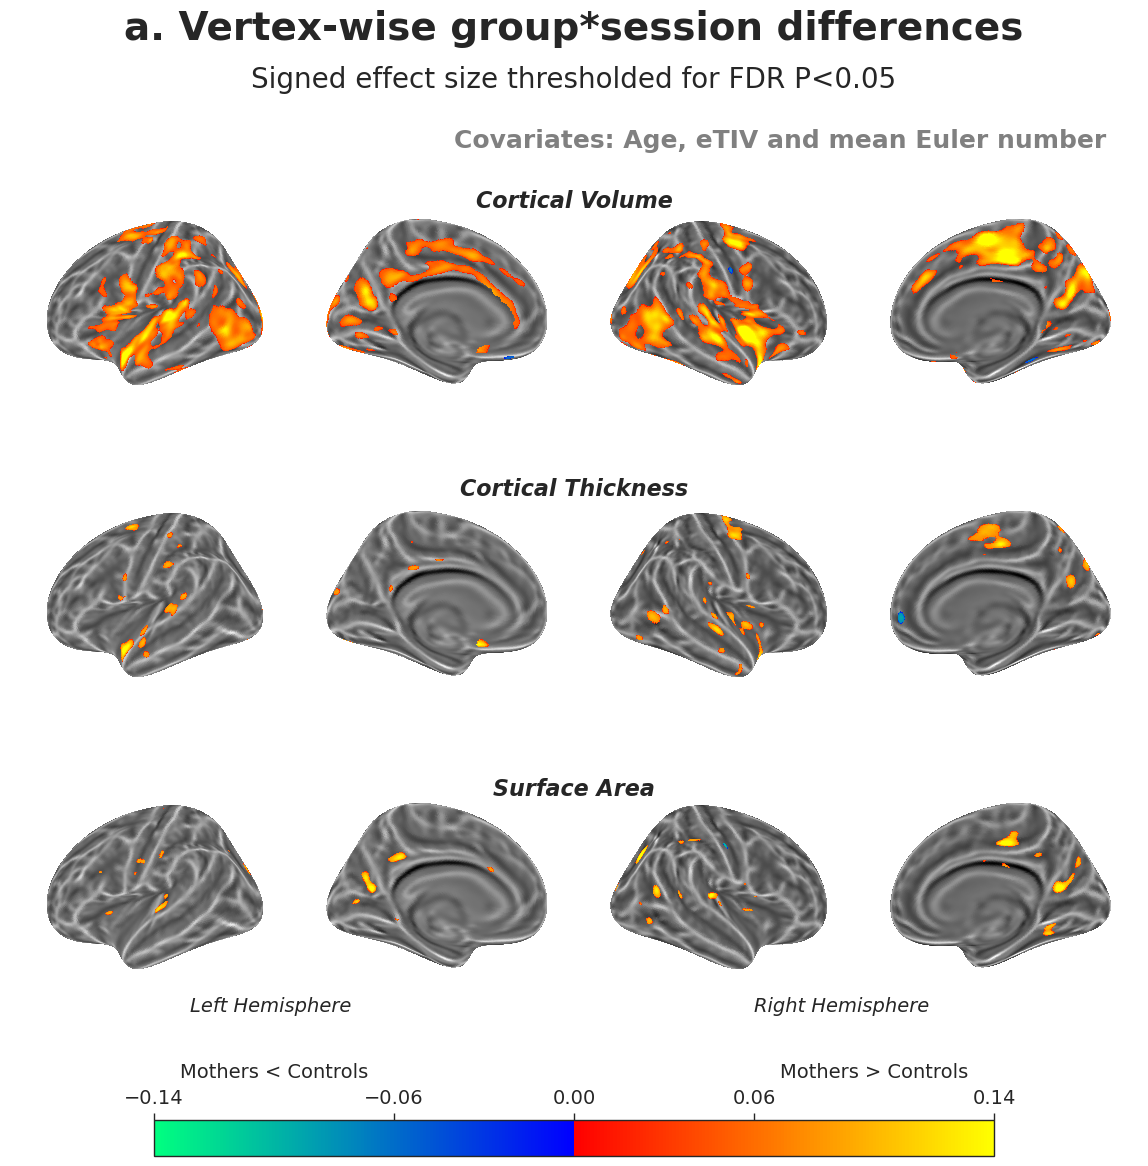

In [11]:
# Importing necessary python modules 
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from nilearn import plotting
from nilearn import datasets
from nilearn.plotting.surf_plotting import _colorbar_from_array
import os

# Defining surface inputs and parameters to select the surface maps
fsaverage = datasets.fetch_surf_fsaverage('fsaverage') 
results_dir = os.path.join(os.getcwd(), 'main_data', 'covariates_euler_age_etiv')

stat = 'FDRcorrP_across_hemi'
eff_size = 'partialETA2'
alpha = 0.05
one_minus_alpha = 1.0 - alpha

# Defining colormaps and limits for the visualization and colorbar
vmax_value = 0.14
threshold = 0.001
colors_pos = plt.cm.autumn(np.linspace(0, 1, 128))
colors_neg = plt.cm.winter(np.linspace(1, 0, 128))
colors = np.vstack((colors_neg, colors_pos))
our_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Defining contrasts and cortical measures to plot
contrast = 'groupxses'
contrast_label = 'Group x Session'
measures = ['volume', 'thickness', 'area']

# Plotting
figsm3a, axsm3a = plt.subplots(3, 4, subplot_kw={'projection': '3d'}, figsize=(12,12))
figsm3a.subplots_adjust(wspace=0, hspace=0, top=0.85, right=0.97, left=0.03, bottom=0.12)
for w, measure in enumerate(measures):
    for i, (hemi, hemi_name, surf, surf_bg) in enumerate(zip(["lh", "rh"],
                                                    ["left", "right"],
                                                    [fsaverage.infl_left, fsaverage.infl_right],
                                                    [fsaverage.curv_left, fsaverage.curv_right])):
        # Loading the fdr-pvalue, effect size and sign maps 
        mfdrp_map_name = f"{hemi}.{measure}_sm10_{stat}_contrast_{contrast}.mgh"
        eff_size_map_name = f"{hemi}.{measure}_sm10_{eff_size}_contrast_{contrast}.mgh"
        sgn_map_name = f"{hemi}.{measure}_sm10_sgn_contrast_{contrast}.mgh"
        
        mfdrp_data = nib.load(f"{results_dir}/{mfdrp_map_name}").get_fdata()
        eff_size_data = nib.load(f"{results_dir}/{eff_size_map_name}").get_fdata()
        sgn_data = nib.load(f"{results_dir}/{sgn_map_name}").get_fdata()

        # Computing thresholded signed effect size maps
        surf_map = sgn_data * eff_size_data * (mfdrp_data > one_minus_alpha)
        for j, view in enumerate(["lateral", "medial"]):
            plotting.plot_surf_stat_map(surf,
                                        surf_map,
                                        hemi=hemi_name,
                                        view=view,
                                        vmax=vmax_value,
                                        threshold=threshold,
                                        bg_map=surf_bg,
                                        cmap=our_cmap,
                                        colorbar=False,
                                        axes=axsm3a[w, 2*i+j])
figsm3a.text(0.50, 0.95, s='a. Vertex-wise group*session differences', fontsize=28, fontweight='bold', ha='center')
figsm3a.text(0.50, 0.91, s='Signed effect size thresholded for FDR P<0.05', fontsize=20, ha='center')
figsm3a.text(0.40, 0.86, s='Covariates: Age, eTIV and mean Euler number ', fontsize=18, color='gray', fontweight='bold')
figsm3a.text(0.5, 0.81, s='Cortical Volume', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3a.text(0.5, 0.57, s='Cortical Thickness', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3a.text(0.5, 0.32, s='Surface Area', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3a.text(0.18, 0.14, s='Left Hemisphere', fontsize=14, style='italic')
figsm3a.text(0.65, 0.14, s='Right Hemisphere', fontsize=14, style='italic')

# Colorbar setup
cbar_axsm3a = figsm3a.add_axes([0.15, 0.02, 0.7, 0.03])
cbsm3a = _colorbar_from_array(np.random.random([0, 1]), vmax_value, None, {}, cmap=our_cmap)
fig_cbsm3a = figsm3a.colorbar(cbsm3a, cax=cbar_axsm3a, ticks=[-vmax_value, -0.06, 0.00, 0.06, vmax_value], orientation='horizontal')
cbar_axsm3a.tick_params(labelsize=14)
cbar_axsm3a.xaxis.set_label_position('top')
cbar_axsm3a.xaxis.set_ticks_position('top')
figsm3a.text(0.25, 0.09, s='Mothers < Controls', fontsize=14, va='center', ha='center')
figsm3a.text(0.75, 0.09, s='Mothers > Controls', fontsize=14, va='center', ha='center')

figsm3a.savefig('Figure-sm3a_vertex-wise-effect-size-interaction-with-age-etiv-and-euler-as-covariates.png', dpi=300)

In [12]:
# Free RAM memory for next figure
figsm3a.clf()
gc.collect()

7866878

### Figure SM 3.b: Vertex-wise group x session differences including *Age* and *TIV* (eTIV), *meanEulerNumber*, *PSQI* and *PSS* as covariates

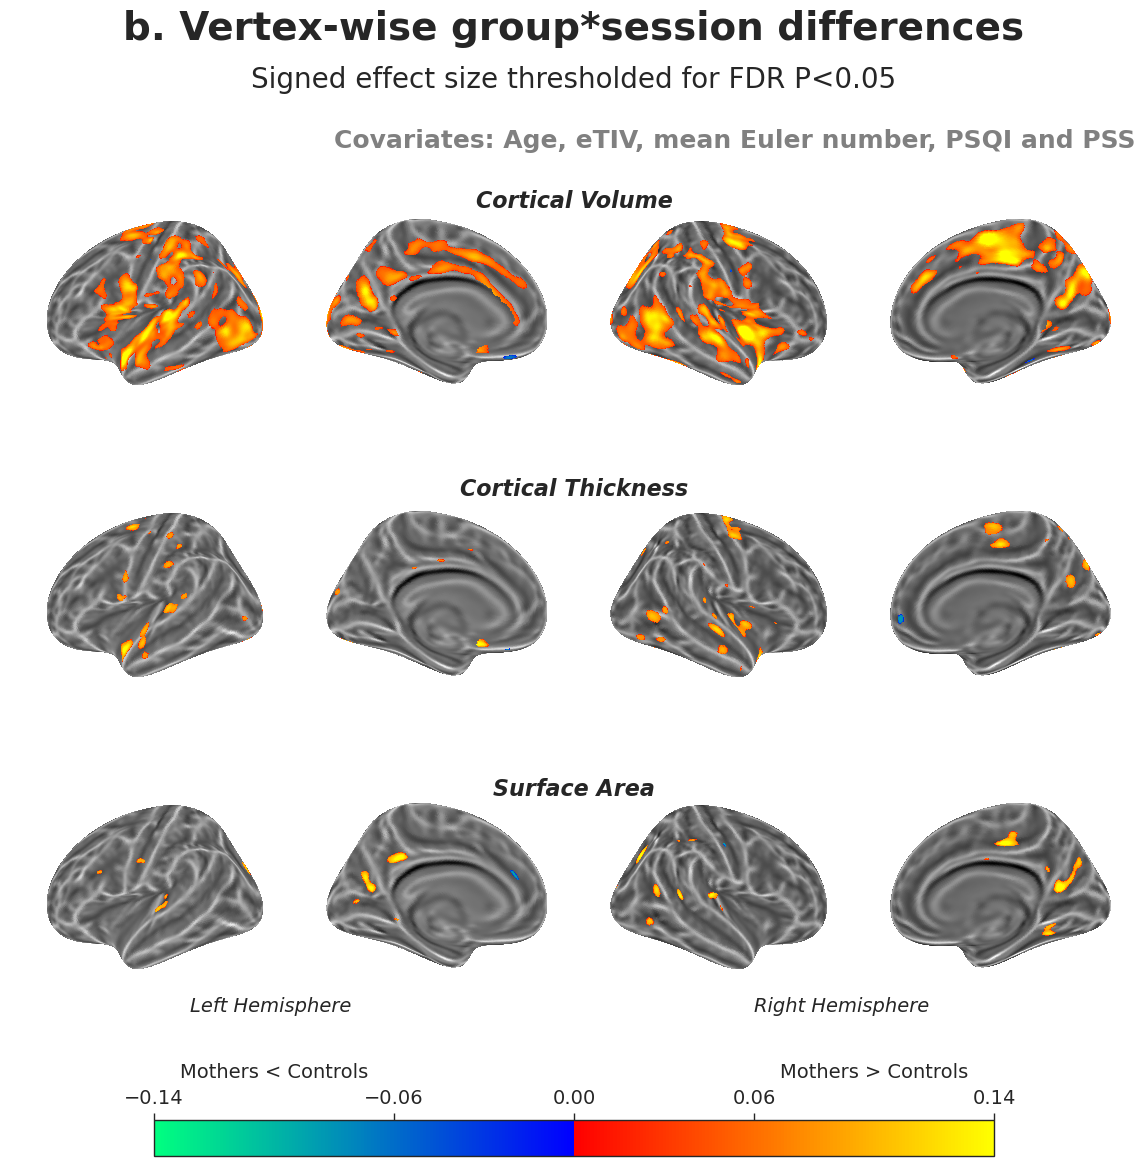

In [13]:
# Importing necessary python modules 
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from nilearn import plotting
from nilearn import datasets
from nilearn.plotting.surf_plotting import _colorbar_from_array
import os

# Defining surface inputs and parameters to select the surface maps
fsaverage = datasets.fetch_surf_fsaverage('fsaverage') 
results_dir = os.path.join(os.getcwd(), 'main_data', 'covariates_euler_age_etiv_psqi_pss')

stat = 'FDRcorrP_across_hemi'
eff_size = 'partialETA2'
alpha = 0.05
one_minus_alpha = 1.0 - alpha

# Defining colormaps and limits for the visualization and colorbar
vmax_value = 0.14
threshold = 0.001
colors_pos = plt.cm.autumn(np.linspace(0, 1, 128))
colors_neg = plt.cm.winter(np.linspace(1, 0, 128))
colors = np.vstack((colors_neg, colors_pos))
our_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Defining contrasts and cortical measures to plot
contrast = 'groupxses'
contrast_label = 'Group x Session'
measures = ['volume', 'thickness', 'area']

# Plotting
figsm3b, axsm3b = plt.subplots(3, 4, subplot_kw={'projection': '3d'}, figsize=(12,12))
figsm3b.subplots_adjust(wspace=0, hspace=0, top=0.85, right=0.97, left=0.03, bottom=0.12)
for w, measure in enumerate(measures):
    for i, (hemi, hemi_name, surf, surf_bg) in enumerate(zip(["lh", "rh"],
                                                    ["left", "right"],
                                                    [fsaverage.infl_left, fsaverage.infl_right],
                                                    [fsaverage.curv_left, fsaverage.curv_right])):
        # Loading the fdr-pvalue, effect size and sign maps 
        mfdrp_map_name = f"{hemi}.{measure}_sm10_{stat}_contrast_{contrast}.mgh"
        eff_size_map_name = f"{hemi}.{measure}_sm10_{eff_size}_contrast_{contrast}.mgh"
        sgn_map_name = f"{hemi}.{measure}_sm10_sgn_contrast_{contrast}.mgh"
        
        mfdrp_data = nib.load(f"{results_dir}/{mfdrp_map_name}").get_fdata()
        eff_size_data = nib.load(f"{results_dir}/{eff_size_map_name}").get_fdata()
        sgn_data = nib.load(f"{results_dir}/{sgn_map_name}").get_fdata()

        # Computing thresholded signed effect size maps
        surf_map = sgn_data * eff_size_data * (mfdrp_data > one_minus_alpha)
        for j, view in enumerate(["lateral","medial"]):
            plotting.plot_surf_stat_map(surf,
                                        surf_map,
                                        hemi=hemi_name,
                                        view=view,
                                        vmax=vmax_value,
                                        threshold=threshold,
                                        bg_map=surf_bg,
                                        cmap=our_cmap,
                                        colorbar=False,
                                        axes=axsm3b[w, 2*i+j])
figsm3b.text(0.50, 0.95, s='b. Vertex-wise group*session differences', fontsize=28, fontweight='bold', ha='center')
figsm3b.text(0.50, 0.91, s='Signed effect size thresholded for FDR P<0.05', fontsize=20, ha='center')
figsm3b.text(0.30, 0.86, s='Covariates: Age, eTIV, mean Euler number, PSQI and PSS', fontsize=18, color='gray', fontweight='bold')
figsm3b.text(0.5, 0.81, s='Cortical Volume', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3b.text(0.5, 0.57, s='Cortical Thickness', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3b.text(0.5, 0.32, s='Surface Area', fontsize=16, fontweight='bold', style='italic', ha='center')
figsm3b.text(0.18, 0.14, s='Left Hemisphere', fontsize=14, style='italic')
figsm3b.text(0.65, 0.14, s='Right Hemisphere', fontsize=14, style='italic')

# Colorbar setup
cbar_axsm3b = figsm3b.add_axes([0.15, 0.02, 0.7, 0.03])
cbsm3b = _colorbar_from_array(np.random.random([0, 1]), vmax_value, None, {}, cmap=our_cmap)
fig_cbsm3b = figsm3b.colorbar(cbsm3b, cax=cbar_axsm3b, ticks=[-vmax_value, -0.06, 0.00, 0.06, vmax_value],  orientation='horizontal')
cbar_axsm3b.tick_params(labelsize=14)
cbar_axsm3b.xaxis.set_label_position('top')
cbar_axsm3b.xaxis.set_ticks_position('top')
figsm3b.text(0.25, 0.09, s='Mothers < Controls', fontsize=14, va='center', ha='center')
figsm3b.text(0.75, 0.09, s='Mothers > Controls', fontsize=14, va='center', ha='center')

figsm3b.savefig('Figure-sm3b_vertex-wise-effect-size-interaction-with-age-etiv-euler-psqi-pss-as-covariates.png', dpi=300)

In [14]:
# Free RAM memory for next figure
figsm3b.clf()
gc.collect()

7866878

## Figure SM 4: Spin-test for mean signed effect size for all contrasts and cortical maps over the Yeo's 7 large-scale functional networks

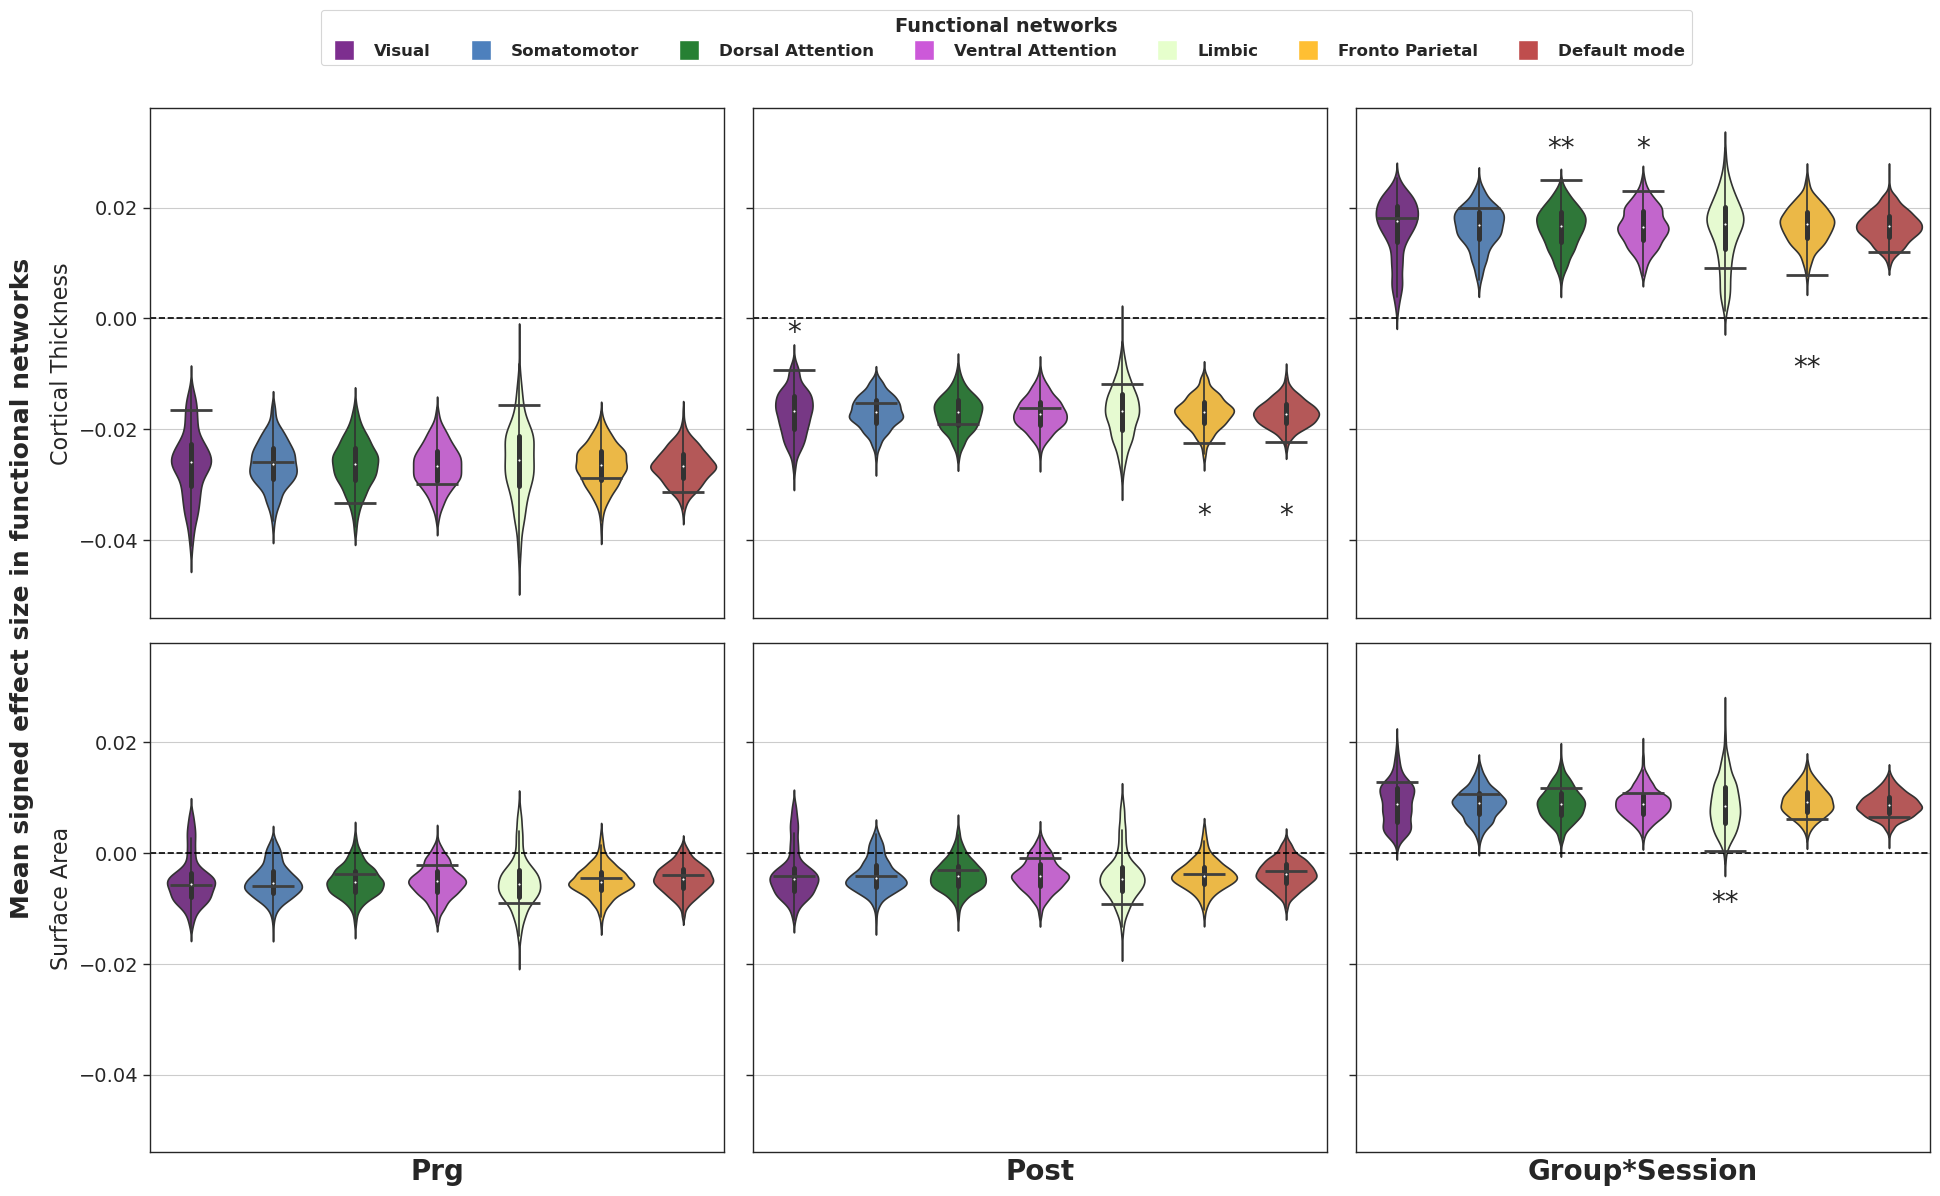

In [15]:
# Importing necessary python modules and setting up seaborn plotting style
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sns.set_style('ticks')
sns.set_context('paper')

# Loading dataframe with precomputed data
df_yeo_spin_test = pd.read_feather("./spin-test/yeo_spin_test_data.feather")
df_yeo_spin_test_pvalues = pd.read_feather("./spin-test/yeo_spin_test_pvalues.feather")

# Setting variables to custom visualization
no_rot = ['original']
yeo7net_order = ['visual', 'somatomotor', 'dorsal_attention', 'ventral_attention', 'limbic', 'fronto_parietal', 'default_mode']
yeo7net_labels = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Fronto Parietal', 'Default mode']
yeo7net_colors  =[(.49, 0.18, 0.56),
                  (0.3, 0.5, 0.74),
                  (0.15, 0.5, 0.2),
                  (0.8, 0.35, .85),
                  (0.9, 1.0, 0.8),
                  (1.0, 0.75, 0.2),
                  (0.75, 0.3, 0.3)]
contrasts = ['sesPrg', 'sesPost', 'groupxses']
contrast_labels = ['Prg', 'Post', 'Group*Session']

custom_handles = [Line2D([], [], color='w', markerfacecolor=c, marker='s', markersize=15, label=l) for c, l in zip(yeo7net_colors, yeo7net_labels)]

data_set = 'main_data'
model = 'without_covariates'
metrics = ['thickness', 'area']
metric_labels = ['Cortical Thickness', 'Surface Area']
map_metric = 'signed_partialETA2'

#Plotting
figsm4, axsm4 = plt.subplots(2, 3, figsize=(20,12), sharey=True, sharex=True)
figsm4.subplots_adjust(wspace=0.05, hspace=0.05, top=0.9, right=0.98, left=0.09, bottom=0.03)

for c, contrast in enumerate(contrasts):
    for m, metric in enumerate(metrics):
        df_plot = df_yeo_spin_test.query("data_set==@data_set and model==@model and contrast==@contrast \
                                          and metric==@metric and map_metric==@map_metric")
        sns.swarmplot(x='parcel_name', y='map_value',
                      data=df_plot.query("rotation==@no_rot"),
                      order=yeo7net_order,
                      size=30, linewidth=2, marker="_", ax=axsm4[m,c])
        sns.violinplot(x='parcel_name', y='map_value',
                       order=yeo7net_order, palette=yeo7net_colors,
                       data=df_plot.query("rotation!=@no_rot"),
                       saturation=0.8, ax=axsm4[m,c])
        
        axsm4[m,c].set_xlabel('{}'.format(contrast_labels[c]), fontsize=20, weight='bold')
        axsm4[m,c].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        axsm4[m,c].tick_params(labelsize=14)
        axsm4[m,c].grid(axis='y')
        axsm4[m,c].axhline(y = 0, ls='--', color='k')    
        axsm4[m,c].set_ylabel(f'{metric_labels[m]}',  fontsize=16)#, weight='bold')
axsm4[0,0].legend(title='Functional networks', handles=custom_handles, ncols=7, 
                  bbox_to_anchor=(2.7, 1.21, 0.0, 0.0), prop = {'weight':'bold','size': 12},
                  title_fontproperties={'weight':'bold', 'size': 14})
ymin, ymax = axsm4[0,0].get_ylim()
perc_pos_sym = [0.45, 0.44, 0.08]
perc_neg_sym = [0.10, 0.20, 0.49]
d_perc_sym = 0.0
for c, contrast in enumerate(contrasts):
    for m, metric in enumerate(metrics):
        df_plot_pvalues = df_yeo_spin_test_pvalues.query("data_set==@data_set and model==@model and contrast==@contrast \
                                                          and metric==@metric and map_metric==@map_metric")
        for j, p in enumerate(yeo7net_order):
            p_pos = df_plot_pvalues.query('parcel_name==@p and tail=="positive"').p_value.values[0]
            p_neg = df_plot_pvalues.query('parcel_name==@p and tail=="negative"').p_value.values[0]
            p_val = min(p_pos, p_neg)
            if p_pos == p_val:
                 y_sym = ymax - (perc_pos_sym[c] - d_perc_sym*(j%2))*(ymax - ymin)
            if p_neg == p_val:
                 y_sym = ymin + (perc_neg_sym[c] + d_perc_sym*(j%2))*(ymax - ymin)
            if p_val < 0.05:
                symbol = r"*"
                if p_val < 0.01:
                    symbol = r"**"
                axsm4[m,c].text(j, y_sym, symbol, ha='center', va='center', fontsize=20)

figsm4.supylabel("Mean signed effect size in functional networks", fontsize=18, fontweight='bold')
figsm4.savefig(f'Figure-sm4_Yeo-7networks-spin-tests-signed-effect-size-for-all-contrasts-and-cortical-maps.png', dpi=300)

In [16]:
# Free RAM memory for next figure
figsm4.clf()
gc.collect()

19676